## Rank aggregation

Multiple lists of ranks have been obtained with network based proximity

In [1]:
library(TopKLists)

# Test data

In [117]:
data(breast)

### Estimating $k$

In [3]:
deltaplot.dir <- "test-deltaplot"
dir.create(deltaplot.dir, showWarnings = FALSE)
a <- deltaplot(breast, deltas = seq(0,300, by=5), directory=deltaplot.dir)

In [4]:
res <- j0.multi(breast, d=6, v=10)
res

$maxK
[1] 14

$L
     list1    list2  v j0_est  k delta
1 TransBig     MDCC 10      9  8     6
2 TransBig  Pusztai 10      9  8     6
3     MDCC TransBig 10     11 10     6
4     MDCC  Pusztai 10     13 12     6
5  Pusztai TransBig 10     11 10     6
6  Pusztai     MDCC 10     15 14     6

$Idata
       TransBig_MDCC TransBig_Pusztai MDCC_TransBig MDCC_Pusztai
  [1,]             1                1             1            1
  [2,]             1                1             1            1
  [3,]             1                1             1            1
  [4,]             1                1             1            1
  [5,]             0                0             1            1
  [6,]             1                1             1            1
  [7,]             0                0             1            1
  [8,]             1                1             0            1
  [9,]             1                1             0            0
 [10,]             0                0             1            1
 [11,]             0                0             1            0
 [12,]             1                1             1            1
 [13,]             0                1             0            1
 [14,]             1                0             0            1
 [15,]             0                0             1            0
 [16,]             1                1             0            0
 [17,]             1                0             1            0
 [18,]             0                1             0            0
 [19,]             1                0             0            1
 [20,]             0                0             0            0
 [21,]             0                0             0            0
 [22,]             0                0             0            1
 [23,]             0                1             0            1
 [24,]             0                1             0            1
 [25,]             0                0             0            0
 [26,]             0                0             0            0
 [27,]             0                1             0            1
 [28,]             0                0             0            0
 [29,]             0                0             0            0
 [30,]             0                0             0            0
 [31,]             1                0             1            0
 [32,]             0                0             0            0
 [33,]             0                0             0            0
 [34,]             0                0             0            1
 [35,]             0                0             0            0
 [36,]             0                0             0            0
 [37,]             0                0             0            0
 [38,]             1                0             0            0
 [39,]             0                0             0            0
 [40,]             0                0             0            0
 [41,]             0                0             1            0
 [42,]             0                0             0            0
 [43,]             0                0             0            0
 [44,]             0                0             0            0
 [45,]             1                0             1            0
 [46,]             0                0             1            0
 [47,]             0                0             0            0
 [48,]             0                0             0            0
 [49,]             1                0             0            0
 [50,]             0                1             0            1
 [51,]             0                0             0            0
 [52,]             0                0             0            0
 [53,]             0                0             0            0
 [54,]             0                0             1            0
 [55,]             1                0             0            0
 [56,]             1                0             1           

In [77]:
k <- res$maxK
TransBig <- as.character(breast[1:k,1])
MDCC <- as.character(breast[1:k,2])
Pusztai <- as.character(breast[1:k,3])
input <- list(TransBig, MDCC, Pusztai)
common <- unique(unlist(input))
space <- list(common, common, common)

In [109]:
make.breast.inputs <- function(breast, res){
    k <- res$maxK
    input <- as.list(breast[1:k, ])
    common <- unique(unlist(input))
    space <- rep(list(common), length(breast))
    val <- list(input = input, space = space)
    return(val)
}

breast.inputs <- make.breast.inputs(breast, res)

In [110]:
input.df <- data.frame(input)
names(input.df) <- names(breast)
input.df

TransBig MDCC     Pusztai 
1  ESR1     ESR1     ESR1    
2  TBC1D9   TBC1D9   TBC1D9  
3  SCUBE2   EVL      SCUBE2  
4  EVL      SCUBE2   FBP1    
5  NAT2     CIRBP    EVL     
6  BTG2     FBP1     RHOB    
7  GSTM3    FUT8     QDPR    
8  FBP1     RHOB     CIRBP   
9  CIRBP    KIAA1324 IDUA    
10 ORC6L    BTG2     BTG2    
11 BUB1     TBX3     FUT8    
12 FUT8     C1orf106 YEATS2  
13 PCSK6    QDPR     BLOC1S1 
14 PFKP     IDUA     C1orf106

### Uniform weights

In [111]:
outBorda <- do.call(Borda, breast.inputs)
outMC <- do.call(MC, breast.inputs)
outCEMC <- do.call(CEMC, c(breast.inputs, list(N=2000)))
#outCEMC <- CEMC(input, space, N=2000)
outCEMC$TopK[1:k]

[1] ESR1     TBC1D9   SCUBE2   EVL      FBP1     CIRBP    FUT8     RHOB    
 [9] BTG2     QDPR     IDUA     C1orf106 NAT2     GSTM3   
917 Levels: AAMP AANAT ABCB8 ABCD2 ABI2 ACADS ACIN1 ACOT8 ACTL7A ... ZYX

In [126]:
str(outCEMC)

List of 3
 $ TopK      : Factor w/ 917 levels "AAMP","AANAT",..: 255 803 701 256 270 161 294 673 83 646 ...
 $ ProbMatrix: num [1:22, 1:22] 4.84e-13 2.16e-11 7.73e-13 2.24e-12 4.75e-11 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:22] "75" "83" "84" "91" ...
  .. ..$ : chr [1:22] "1" "2" "3" "4" ...
 $ input.par :'data.frame':	1 obs. of  13 variables:
  ..$ k     : int 22
  ..$ dm    : 'AsIs' chr "k"
  ..$ kp    : num 0.5
  ..$ N     : num 2000
  ..$ N1    : num 200
  ..$ extra : num 0
  ..$ rho   : num 0.1
  ..$ e1    : num 0.1
  ..$ e2    : num 1
  ..$ w     : num 0.5
  ..$ b     : num 0
  ..$ init.m: 'AsIs' chr "p"
  ..$ init.w: num 0


In [129]:
write.csv(outCEMC$TopK, "~/Desktop/test-cemc-topk.csv")

### Non-uniform weights

The aggregated ranking below confirms that the weighing functionality of `CEMC` works as expected.

In [112]:
outCEMC.w <- CEMC(input, space, N=2000, d.w=c(0, 1, 0))
outCEMC.w$TopK[1:k]

[1] "ESR1"     "TBC1D9"   "EVL"      "SCUBE2"   "CIRBP"    "FBP1"    
 [7] "FUT8"     "RHOB"     "KIAA1324" "BTG2"     "TBX3"     "C1orf106"
[13] "QDPR"     "IDUA"

### Scaling of CEMC runtime with the number of lists

In [113]:
breast1 <- breast
permuter <- function() c(sample(5), sample(6:20), sample(21:917))
breast1$TransBig1 <- breast$TransBig[permuter()]
breast1$MDCC1 <- breast$MDCC[permuter()]
breast1$Pusztai1 <- breast$Pusztai[permuter()]
str(breast1)

'data.frame':	917 obs. of  6 variables:
 $ TransBig : Factor w/ 917 levels "AAMP","AANAT",..: 255 803 701 256 504 83 341 270 161 551 ...
 $ MDCC     : Factor w/ 917 levels "AAMP","AANAT",..: 255 803 256 701 161 270 294 673 415 83 ...
 $ Pusztai  : Factor w/ 917 levels "AAMP","AANAT",..: 255 803 701 270 256 673 646 161 378 83 ...
 $ TransBig1: Factor w/ 917 levels "AAMP","AANAT",..: 803 701 504 255 256 551 500 327 805 148 ...
 $ MDCC1    : Factor w/ 917 levels "AAMP","AANAT",..: 161 256 701 803 255 15 294 500 415 512 ...
 $ Pusztai1 : Factor w/ 917 levels "AAMP","AANAT",..: 803 701 256 255 270 294 567 620 272 161 ...


In [114]:
res1 <- j0.multi(breast1, d=6, v=10)
res1

$maxK
[1] 17

$L
       list1     list2  v j0_est  k delta
1   TransBig      MDCC 10      9  8     6
2   TransBig   Pusztai 10      9  8     6
3   TransBig TransBig1 10     12 11     6
4   TransBig     MDCC1 10      6  5     6
5   TransBig  Pusztai1 10      6  5     6
6       MDCC  TransBig 10     11 10     6
7       MDCC   Pusztai 10     13 12     6
8       MDCC TransBig1 10      7  6     6
9       MDCC     MDCC1 10     18 17     6
10      MDCC  Pusztai1 10     12 11     6
11   Pusztai  TransBig 10     11 10     6
12   Pusztai      MDCC 10     15 14     6
13   Pusztai TransBig1 10      6  5     6
14   Pusztai     MDCC1 10      6  5     6
15   Pusztai  Pusztai1 10      9  8     6
16 TransBig1  TransBig 10      8  7     6
17 TransBig1      MDCC 10      6  5     6
18 TransBig1   Pusztai 10      6  5     6
19 TransBig1     MDCC1 10      8  7     6
20 TransBig1  Pusztai1 10      6  5     6
21     MDCC1  TransBig 10      8  7     6
22     MDCC1      MDCC 10     11 10     6
23     MDCC1   Pusztai 10      8  7     6
24     MDCC1 TransBig1 10      8  7     6
25     MDCC1  Pusztai1 10      8  7     6
26  Pusztai1  TransBig 10     11 10     6
27  Pusztai1      MDCC 10     11 10     6
28  Pusztai1   Pusztai 10     12 11     6
29  Pusztai1 TransBig1 10      6  5     6
30  Pusztai1     MDCC1 10      7  6     6

$Idata
       TransBig_MDCC TransBig_Pusztai TransBig_TransBig1 TransBig_MDCC1
  [1,]             1                1                  1              1
  [2,]             1                1                  1              1
  [3,]             1                1                  1              1
  [4,]             1                1                  1              1
  [5,]             0                0                  1              0
  [6,]             1                1                  0              0
  [7,]             0                0                  0              0
  [8,]             1                1                  0              1
  [9,]             1                1                  1              0
 [10,]             0                0                  1              0
 [11,]             0                0                  1              0
 [12,]             1                1                  1              1
 [13,]             0                1                  1              0
 [14,]             1                0                  1              1
 [15,]             0                0                  0              0
 [16,]             1                1                  1              1
 [17,]             1                0                  0              1
 [18,]             0                1                  1              0
 [19,]             1                0                  0              0
 [20,]             0                0                  0              0
 [21,]             0                0                  0              0
 [22,]             0                0                  0              0
 [23,]             0                1                  0              0
 [24,]             0                1                  0              0
 [25,]             0                0                  0              0
 [26,]             0                0                  0              0
 [27,]             0                1                  0              0
 [28,]             0                0                  0              0
 [29,]             0                0                  0              0
 [30,]             0                0                  0              0
 [31,]             1                0                  0              0
 [32,]             0                0                  0              0
 [33,]             0                0                  0              0
 [34,]             0                0                  0              0
 [35,]             0                0                  0              0
 [36,]             0                0                  0              0
 [37,]   

In [118]:
str(breast.inputs)

List of 2
 $ input:List of 3
  ..$ TransBig: Factor w/ 917 levels "AAMP","AANAT",..: 255 803 701 256 504 83 341 270 161 551 ...
  ..$ MDCC    : Factor w/ 917 levels "AAMP","AANAT",..: 255 803 256 701 161 270 294 673 415 83 ...
  ..$ Pusztai : Factor w/ 917 levels "AAMP","AANAT",..: 255 803 701 270 256 673 646 161 378 83 ...
 $ space:List of 3
  ..$ : Factor w/ 917 levels "AAMP","AANAT",..: 255 803 701 256 504 83 341 270 161 551 ...
  ..$ : Factor w/ 917 levels "AAMP","AANAT",..: 255 803 701 256 504 83 341 270 161 551 ...
  ..$ : Factor w/ 917 levels "AAMP","AANAT",..: 255 803 701 256 504 83 341 270 161 551 ...


In [130]:
write.csv(breast1.inputs$input, file = "../../results/2021-12-31-rank-aggregation/breast-input.csv", row.names=FALSE)
write.csv(breast1.inputs$space, file = "../../results/2021-12-31-rank-aggregation/breast-space.csv", row.names=FALSE)

In [116]:
breast1.inputs <- make.breast.inputs(breast1, res1)
outBorda1 <- do.call(Borda, breast1.inputs)
outMC1 <- do.call(MC, breast1.inputs)
outCEMC1 <- do.call(CEMC, c(breast1.inputs, list(N=2000)))
outCEMC1$TopK[1:k]

[1] ESR1     TBC1D9   SCUBE2   EVL      CIRBP    FBP1     BTG2     FUT8    
 [9] C1orf106 PCSK6    RHOB     TBX3     QDPR     PFKP    
917 Levels: AAMP AANAT ABCB8 ABCD2 ABI2 ACADS ACIN1 ACOT8 ACTL7A ... ZYX

In [122]:
CEMCtimer <- function(nvoters, breast.inputs){
    breast.inputs <- lapply(breast.inputs, function(x) x[1:nvoters])
    start <- Sys.time()
    outCEMC <- do.call(CEMC, c(breast.inputs, list(N=2000)))
    runtime <- Sys.time() - start
    return(runtime)
}

runtimes <- sapply(1:6, function(n) CEMCtimer(n, breast1.inputs))
runtimes

[1] 1.212972 2.431929 3.740252 5.091571 5.266511 8.657899

The plot shows linear scaling, which is great news!

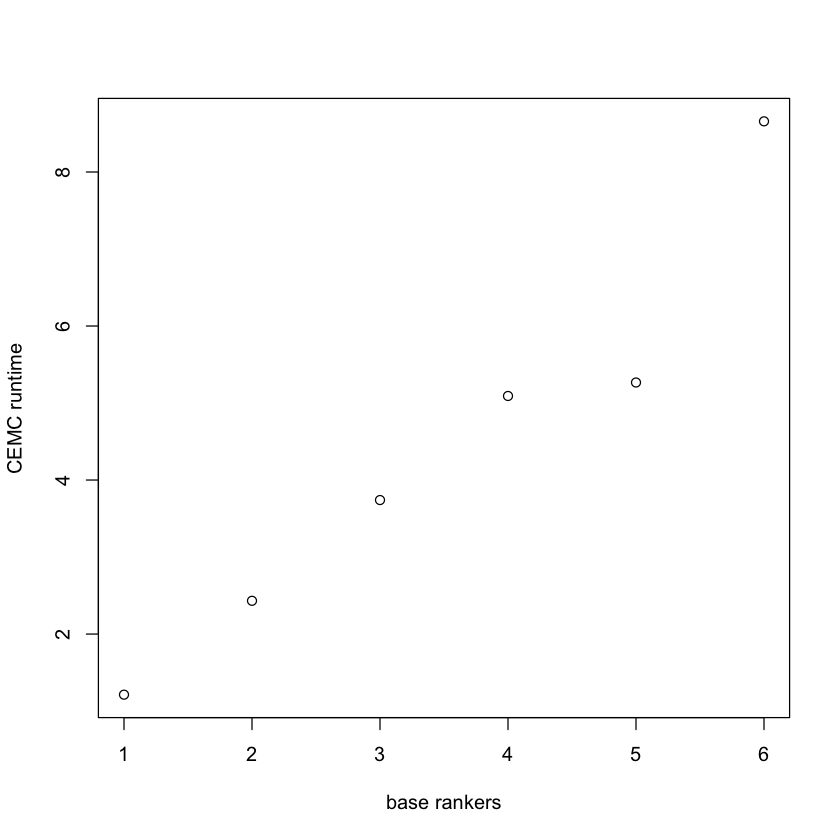

In [124]:
plot(runtimes, xlab="base rankers", ylab="CEMC runtime")

# ChEMBL

In [30]:
fpath <- "../../results/2021-12-02-proximity-various-ADgenesets/ranked-chembl-ids.csv"
chembl_ids <- read.csv(fpath, as.is = TRUE)[-1]
#chembl_ids <- chembl_ids[1:3]
names(chembl_ids) <- sub("\\.", "", names(chembl_ids))
head(chembl_ids)

knowledge     TWAS2        agora2       agora        DESudhir     
1 CHEMBL1770916 CHEMBL1165   CHEMBL838    CHEMBL1522   CHEMBL2336071
2 CHEMBL520733  CHEMBL1168   CHEMBL317094 CHEMBL251940 CHEMBL3358920
3 CHEMBL360328  CHEMBL577    CHEMBL1592   CHEMBL125    CHEMBL306043 
4 CHEMBL99946   CHEMBL1581   CHEMBL1168   CHEMBL334966 CHEMBL1096146
5 CHEMBL14370   CHEMBL317094 CHEMBL1581   CHEMBL398435 CHEMBL87992  
6 CHEMBL201960  CHEMBL838    CHEMBL1237   CHEMBL404520 CHEMBL314854 
  ADDE.APOE3.APOE3 ADDE.APOE4.APOE4 APOE34.DE.neuron APOE34.DE.astrocyte
1 CHEMBL1121       CHEMBL927        CHEMBL1909324    CHEMBL3545043      
2 CHEMBL1201185    CHEMBL1121       CHEMBL1318287    CHEMBL2386081      
3 CHEMBL262135     CHEMBL1823872    CHEMBL1139       CHEMBL83626        
4 CHEMBL1823872    CHEMBL262135     CHEMBL46257      CHEMBL3828074      
5 CHEMBL525610     CHEMBL1201185    CHEMBL446452     CHEMBL426559       
6 CHEMBL1536       CHEMBL1131       CHEMBL1193       CHEMBL1951143      
  APOE34.DE.microglia
1 CHEMBL11662        
2 CHEMBL428          
3 CHEMBL1401367      
4 CHEMBL1255654      
5 CHEMBL1200930      
6 CHEMBL1177

In [33]:
fpath <- "../../results/2021-12-02-proximity-various-ADgenesets/merged-proximity-chembl.csv"
drug.info <- read.csv(fpath, skip = 1, as.is = TRUE)[1:6]
names(drug.info)[1] <- "chembl_id"
row.names(drug.info) <- drug.info$chembl_id
head(drug.info)

chembl_id     drug_name       max_phase indication_class   
CHEMBL1770916 CHEMBL1770916 NIROGACESTAT    3                            
CHEMBL520733  CHEMBL520733  SEMAGACESTAT    3                            
CHEMBL360328  CHEMBL360328  LORCASERIN      4                            
CHEMBL99946   CHEMBL99946   LEVOMILNACIPRAN 4                            
CHEMBL14370   CHEMBL14370   REBOXETINE      4                            
CHEMBL201960  CHEMBL201960  PYROVALERONE    4         Stimulant (central)
              uniprot_name                       
CHEMBL1770916 PSN1|PSN2|APH1B|NICA|APH1A|PEN2    
CHEMBL520733  PSN1|PSN2|APH1B|NICA|APH1A|PEN2    
CHEMBL360328  SC6A2|5HT2A|5HT2C|SC6A4|5HT2B|SC6A3
CHEMBL99946   SC6A2|SC6A4|SC6A3                  
CHEMBL14370   SC6A2|SC6A4|SC6A3                  
CHEMBL201960  SC6A2|SC6A4|SC6A3                  
              target_name                                                                                                                                                       
CHEMBL1770916 Gamma-secretase|Gamma-secretase|Gamma-secretase|Gamma-secretase|Gamma-secretase|Gamma-secretase                                                                   
CHEMBL520733  Gamma-secretase|Gamma-secretase|Gamma-secretase|Gamma-secretase|Gamma-secretase|Gamma-secretase                                                                   
CHEMBL360328  Norepinephrine transporter|Serotonin 2a (5-HT2a) receptor|Serotonin 2c (5-HT2c) receptor|Serotonin transporter|Serotonin 2b (5-HT2b) receptor|Dopamine transporter
CHEMBL99946   Norepinephrine transporter|Serotonin transporter|Dopamine transporter                                                                                             
CHEMBL14370   Norepinephrine transporter|Serotonin transporter|Dopamine transporter                                                                                             
CHEMBL201960  Norepinephrine transporter|Serotonin transporter|Dopamine transporter

## Prepare top-$k$ lists

In [6]:
for (frac in c(0.2, 0.5, 1)) {
    deltaplot.dir <- paste0("chembl-deltaplot-", frac)
    dir.create(deltaplot.dir, showWarnings = FALSE)
    a <- deltaplot(chembl_ids, deltas = seq(0, frac * 1000, by=5), directory=deltaplot.dir, subset.lists = frac * nrow(chembl_ids))
}

The deltaplots show that $\delta$ varies between 100 and >300.  It looked to me that $\delta \approx 250$, so I set `d = 250` in the code below.

In [7]:
degeneration <- j0.multi(chembl_ids, d=250, v=100)
degeneration

$maxK
[1] 110

$L
                 list1               list2   v j0_est    k delta
1            knowledge               TWAS2 100   <NA> <NA>   250
2            knowledge              agora2 100   <NA> <NA>   250
3            knowledge               agora 100   <NA> <NA>   250
4            knowledge            DESudhir 100     20   19   250
5            knowledge    ADDE.APOE3.APOE3 100     22   21   250
6            knowledge    ADDE.APOE4.APOE4 100   <NA> <NA>   250
7            knowledge    APOE34.DE.neuron 100   <NA> <NA>   250
8            knowledge APOE34.DE.astrocyte 100   <NA> <NA>   250
9            knowledge APOE34.DE.microglia 100   <NA> <NA>   250
10               TWAS2           knowledge 100   <NA> <NA>   250
11               TWAS2              agora2 100     95   94   250
12               TWAS2               agora 100     11   10   250
13               TWAS2            DESudhir 100   <NA> <NA>   250
14               TWAS2    ADDE.APOE3.APOE3 100   <NA> <NA>   250
15               TWAS2    ADDE.APOE4.APOE4 100   <NA> <NA>   250
16               TWAS2    APOE34.DE.neuron 100   <NA> <NA>   250
17               TWAS2 APOE34.DE.astrocyte 100   <NA> <NA>   250
18               TWAS2 APOE34.DE.microglia 100   <NA> <NA>   250
19              agora2           knowledge 100   <NA> <NA>   250
20              agora2               TWAS2 100    111  110   250
21              agora2               agora 100     12   11   250
22              agora2            DESudhir 100   <NA> <NA>   250
23              agora2    ADDE.APOE3.APOE3 100   <NA> <NA>   250
24              agora2    ADDE.APOE4.APOE4 100     13   12   250
25              agora2    APOE34.DE.neuron 100   <NA> <NA>   250
26              agora2 APOE34.DE.astrocyte 100   <NA> <NA>   250
27              agora2 APOE34.DE.microglia 100   <NA> <NA>   250
28               agora           knowledge 100   <NA> <NA>   250
29               agora               TWAS2 100   <NA> <NA>   250
30               agora              agora2 100   <NA> <NA>   250
31               agora            DESudhir 100   <NA> <NA>   250
32               agora    ADDE.APOE3.APOE3 100     10    9   250
33               agora    ADDE.APOE4.APOE4 100     10    9   250
34               agora    APOE34.DE.neuron 100   <NA> <NA>   250
35               agora APOE34.DE.astrocyte 100   <NA> <NA>   250
36               agora APOE34.DE.microglia 100   <NA> <NA>   250
37            DESudhir           knowledge 100   <NA> <NA>   250
38            DESudhir               TWAS2 100   <NA> <NA>   250
39            DESudhir              agora2 100   <NA> <NA>   250
40            DESudhir               agora 100   <NA> <NA>   250
41            DESudhir    ADDE.APOE3.APOE3 100     74   73   250
42            DESudhir    ADDE.APOE4.APOE4 100     29   28   250
43            DESudhir    APOE34.DE.neuron 100   <NA> <NA>   250
44            DESudhir APOE34.DE.astrocyte 100   <NA> <NA>   250
45            DESudhir APOE34.DE.microglia 100   <NA> <NA>   250
46    ADDE.APOE3.APOE3           knowledge 100   <NA> <NA>   250
47    ADDE.APOE3.APOE3               TWAS2 100   <NA> <NA>   250
48    ADDE.APOE3.APOE3              agora2 100   <NA> <NA>   250
49    ADDE.APOE3.APOE3               agora 100   <NA> <NA>   250
50    ADDE.APOE3.APOE3            DESudhir 100     62   61   250
51    ADDE.APOE3.APOE3    ADDE.APOE4.APOE4 100     66   65   250
52    ADDE.APOE3.APOE3    APOE34.DE.neuron 100   <NA> <NA>   250
53    ADDE.APOE3.APOE3 APOE34.DE.astrocyte 100   <NA> <NA>   250
54    ADDE.APOE3.APOE3 APOE34.DE.microglia 100   <NA> <NA>   250
55    ADDE.APOE4.APOE4           knowledge 100     37   36   250
56    ADDE.APOE4.APOE4               TWAS2 100     58   57   250
57    ADDE.APOE4.APOE4              agora2 100     65   64   250
58    ADDE.APOE4.APOE4               agora 100   <NA> <NA>   250
59    ADDE.APOE4.APOE4            DESudhir 100     15   14   250
60    ADDE.APOE4.APOE4    ADDE.APOE3.APOE3 100     17   16   250
61    ADDE.APOE4.

In the `agg.make.inputs` function the `fullSpace=TRUE` argument means that the space of the aggregated list is that of all 2413 ChEMBL drugs.  On the other hand, `fullSpace=FALSE` will set the space of the aggregated list (the "aggregate space") is the union of the space of the lists of base rankers.

This has an important implication: for `fullSPace=TRUE` the aggregate space is invariable while for `fullSPace=FALSE` it depends on which base rankers are taken into account.

In [8]:
agg.make.inputs <- function(chembl_ids, k=degeneration$maxK, fullSpace=FALSE){
    # The common and space variables may need to be defined based on all drugs in the screen.
    # The fullSpace=TRUE argument expresses that case.
    input <- as.list(chembl_ids[1:k, ])
    common <- if (fullSpace) chembl_ids[[1]] else unique(unlist(input))
    space <- rep(list(common), length(chembl_ids))
    names(space) <- names(chembl_ids)
    val <- list(input = input, space = space)
    return(val)
}

agg.inputs <- agg.make.inputs(chembl_ids, fullSpace = FALSE)
agg.inputs.full <- agg.make.inputs(chembl_ids, fullSpace = TRUE)

In [9]:
str(agg.inputs)

List of 2
 $ input:List of 10
  ..$ knowledge          : chr [1:110] "CHEMBL1770916" "CHEMBL520733" "CHEMBL360328" "CHEMBL99946" ...
  ..$ TWAS2              : chr [1:110] "CHEMBL1165" "CHEMBL1168" "CHEMBL577" "CHEMBL1581" ...
  ..$ agora2             : chr [1:110] "CHEMBL838" "CHEMBL317094" "CHEMBL1592" "CHEMBL1168" ...
  ..$ agora              : chr [1:110] "CHEMBL1522" "CHEMBL251940" "CHEMBL125" "CHEMBL334966" ...
  ..$ DESudhir           : chr [1:110] "CHEMBL2336071" "CHEMBL3358920" "CHEMBL306043" "CHEMBL1096146" ...
  ..$ ADDE.APOE3.APOE3   : chr [1:110] "CHEMBL1121" "CHEMBL1201185" "CHEMBL262135" "CHEMBL1823872" ...
  ..$ ADDE.APOE4.APOE4   : chr [1:110] "CHEMBL927" "CHEMBL1121" "CHEMBL1823872" "CHEMBL262135" ...
  ..$ APOE34.DE.neuron   : chr [1:110] "CHEMBL1909324" "CHEMBL1318287" "CHEMBL1139" "CHEMBL46257" ...
  ..$ APOE34.DE.astrocyte: chr [1:110] "CHEMBL3545043" "CHEMBL2386081" "CHEMBL83626" "CHEMBL3828074" ...
  ..$ APOE34.DE.microglia: chr [1:110] "CHEMBL11662" "CHEMBL428"

In [131]:
write.csv(agg.inputs$input, file = "../../results/2021-12-31-rank-aggregation/chembl-input.csv", row.names=FALSE)
write.csv(agg.inputs$space, file = "../../results/2021-12-31-rank-aggregation/chembl-space.csv", row.names=FALSE)

### Pairwise overlap of top-$k$ drug lists

In [24]:
topKoverlap <- sapply(names(agg.inputs$input), function(x) sapply(names(agg.inputs$input), function(y) length(base::intersect(agg.inputs$input[[x]],agg.inputs$input[[y]]))))
topKoverlap

knowledge TWAS2 agora2 agora DESudhir ADDE.APOE3.APOE3
knowledge           110        20     8      1    17       17             
TWAS2                20       110    53     11     4        1             
agora2                8        53   110     14    14       10             
agora                 1        11    14    110     2        4             
DESudhir             17         4    14      2   110       48             
ADDE.APOE3.APOE3     17         1    10      4    48      110             
ADDE.APOE4.APOE4     17        30    38     10    20       34             
APOE34.DE.neuron     15        28    37      6    15       11             
APOE34.DE.astrocyte   6         9     8      1     8        4             
APOE34.DE.microglia   0         0     5      1     0        1             
                    ADDE.APOE4.APOE4 APOE34.DE.neuron APOE34.DE.astrocyte
knowledge            17               15                6                
TWAS2                30               28                9                
agora2               38               37                8                
agora                10                6                1                
DESudhir             20               15                8                
ADDE.APOE3.APOE3     34               11                4                
ADDE.APOE4.APOE4    110               43                0                
APOE34.DE.neuron     43              110                3                
APOE34.DE.astrocyte   0                3              110                
APOE34.DE.microglia   0                7                8                
                    APOE34.DE.microglia
knowledge             0                
TWAS2                 0                
agora2                5                
agora                 1                
DESudhir              0                
ADDE.APOE3.APOE3      1                
ADDE.APOE4.APOE4      0                
APOE34.DE.neuron      7                
APOE34.DE.astrocyte   8                
APOE34.DE.microglia 110

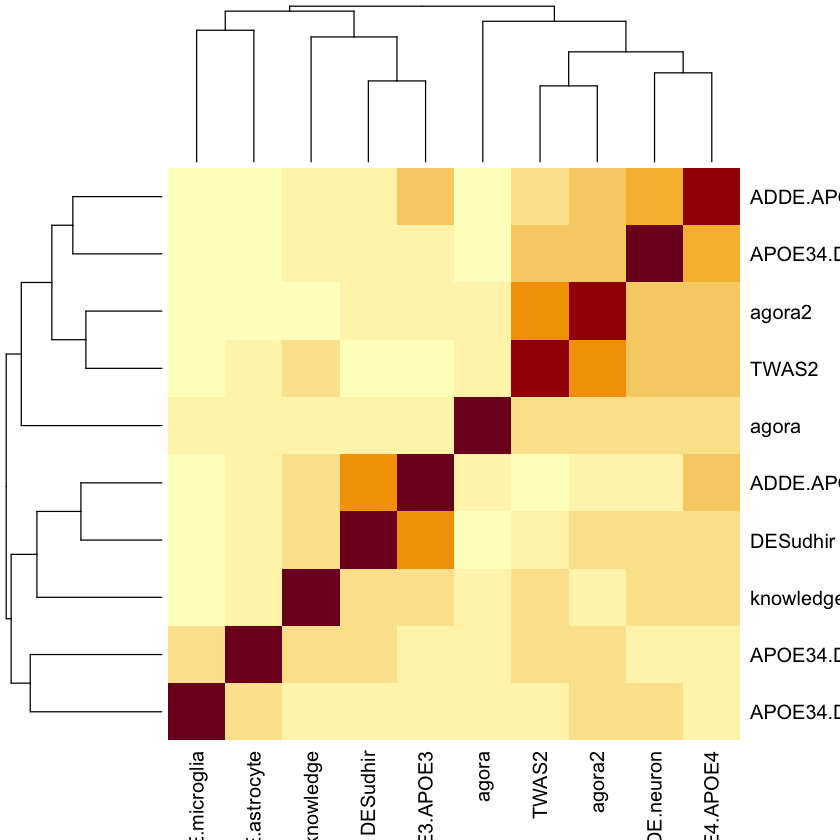

In [25]:
heatmap(topKoverlap)

## List aggregation
### Test runs: 3 base rankers, uniform weight

Here I select only three base rankers and place uniform weight on them.

In [13]:
#sel.cond <- names(chembl_ids)
sel.cond <- c("knowledge", "TWAS2", "APOE34.DE.neuron")
outBorda <- Borda(agg.inputs$input[sel.cond], agg.inputs$space[sel.cond])
outBorda.full <- Borda(agg.inputs.full$input[sel.cond], agg.inputs.full$space[sel.cond])
MC.start <- Sys.time()
outMC <- MC(agg.inputs$input[sel.cond], agg.inputs$space[sel.cond])
MC.stop <- Sys.time()
MC.full.start <- Sys.time()
outMC.full <- MC(agg.inputs.full$input[sel.cond], agg.inputs.full$space[sel.cond])
MC.full.stop <- Sys.time()

In [15]:
MC.stop - MC.start
MC.full.stop - MC.full.start

Time difference of 5.685871 secs

Time difference of 8.954499 secs

In [16]:
CEMC.start <- Sys.time()
outCEMC <- CEMC(agg.inputs$input[sel.cond], agg.inputs$space[sel.cond])
CEMC.stop <- Sys.time()
CEMC.full.start <- Sys.time()
outCEMC.full <- CEMC(agg.inputs.full$input[sel.cond], agg.inputs.full$space[sel.cond])
CEMC.full.stop <- Sys.time()

In [17]:
CEMC.stop - CEMC.start
CEMC.full.stop - CEMC.full.start

Time difference of 5.67997 hours

Time difference of 6.47511 hours

### Results of test runs

In [48]:
v <- c("MC1", "MC2", "MC3")
names(v) <- v
aggnames.MC <- data.frame(lapply(v, function(x) drug.info[outMC[[paste0(x, ".TopK")]], "drug_name"]))

In [49]:
v <- names(outBorda$TopK)
names(v) <- v
aggnames.Borda <- data.frame(lapply(v, function(x) drug.info[outBorda$TopK[[x]], "drug_name"]))

In [50]:
aggnames.CEMC <- list(CEMC = drug.info[outCEMC$TopK, "drug_name"])

In [52]:
aggnames <- cbind(aggnames.MC, aggnames.Borda, aggnames.CEMC)
head(aggnames, n=30)

MC1                  MC2           MC3           mean                
1  NINTEDANIB           NINTEDANIB    NINTEDANIB    NINTEDANIB          
2  MIDOSTAURIN          NERATINIB     MIDOSTAURIN   NERATINIB           
3  NERATINIB            PAZOPANIB     PAZOPANIB     BOSUTINIB           
4  BOSUTINIB            BOSUTINIB     DOVITINIB     MIDOSTAURIN         
5  RUBOXISTAURIN        MIDOSTAURIN   CEDIRANIB     RUBOXISTAURIN       
6  PAZOPANIB            CEDIRANIB     GEFITINIB     PAZOPANIB           
7  DOVITINIB            DOVITINIB     NERATINIB     MASITINIB           
8  MASITINIB            MASITINIB     BOSUTINIB     DOVITINIB           
9  CRIZOTINIB           TOFACITINIB   TOFACITINIB   AXITINIB            
10 AXITINIB             RUBOXISTAURIN ERLOTINIB     CRIZOTINIB          
11 CEDIRANIB            GEFITINIB     RUBOXISTAURIN CEDIRANIB           
12 CANERTINIB           AXITINIB      MASITINIB     CANERTINIB          
13 GEFITINIB            ERLOTINIB     AXITINIB      DASATINIB           
14 BRIVANIB             DASATINIB     SUNITINIB     BRIVANIB            
15 DASATINIB            CRIZOTINIB    CRIZOTINIB    GEFITINIB           
16 TOFACITINIB          ENZASTAURIN   LESTAURTINIB  TOFACITINIB         
17 NIROGACESTAT         SUNITINIB     DASATINIB     AFATINIB            
18 AFATINIB             CANERTINIB    LAPATINIB     ENZASTAURIN         
19 SEMAGACESTAT         LAPATINIB     CANERTINIB    ERLOTINIB           
20 ERLOTINIB            BRIVANIB      BRIVANIB      NIROGACESTAT        
21 ENZASTAURIN          LESTAURTINIB  ENZASTAURIN   MOEXIPRIL           
22 LORCASERIN           FEDRATINIB    AFATINIB      PINAVERIUM          
23 LEVOMILNACIPRAN      AFATINIB      ODANACATIB    SEMAGACESTAT        
24 PINAVERIUM           SELUMETINIB   BOCEPREVIR    RAMIPRIL            
25 ODANACATIB           ODANACATIB    QUIZARTINIB   PENTOLINIUM TARTRATE
26 REBOXETINE           MOTESANIB     SELUMETINIB   LORCASERIN          
27 BOCEPREVIR           QUIZARTINIB   FEDRATINIB    ENALAPRILAT         
28 PENTOLINIUM TARTRATE LINIFANIB     MOTESANIB     EPOPROSTENOL        
29 PYROVALERONE         NILOTINIB     NILOTINIB     LEVOMILNACIPRAN     
30 EPOPROSTENOL         BOCEPREVIR    LINIFANIB     ODANACATIB          
   median                geo.mean             l2norm       
1  BOSUTINIB             NIROGACESTAT         NINTEDANIB   
2  NERATINIB             MOEXIPRIL            MIDOSTAURIN  
3  RUBOXISTAURIN         PINAVERIUM           DOVITINIB    
4  MASITINIB             SEMAGACESTAT         PAZOPANIB    
5  MIDOSTAURIN           RAMIPRIL             BOSUTINIB    
6  NINTEDANIB            PENTOLINIUM TARTRATE NERATINIB    
7  CANERTINIB            LORCASERIN           GEFITINIB    
8  CEDIRANIB             ENALAPRILAT          RUBOXISTAURIN
9  CRIZOTINIB            EPOPROSTENOL         MASITINIB    
10 AXITINIB              NINTEDANIB           CEDIRANIB    
11 BRIVANIB              LEVOMILNACIPRAN      AXITINIB     
12 PAZOPANIB             PERINDOPRIL          CRIZOTINIB   
13 DASATINIB             PUTRESCINE           CANERTINIB   
14 AFATINIB              NERATINIB            BRIVANIB     
15 DOVITINIB             BOSUTINIB            DASATINIB    
16 GEFITINIB             REBOXETINE           ERLOTINIB    
17 ERLOTINIB             IMIDAPRIL            TOFACITINIB  
18 ENZASTAURIN           ARUNDINE             AFATINIB     
19 TOFACITINIB           PYROVALERONE         ENZASTAURIN  
20 MOTESANIB             BENAZEPRIL           SUNITINIB    
21 SELUMETINIB           PHENIRAMINE          SELUMETINIB  
22 VANDETANIB            MILNACIPRAN          LAPATINIB    
23 NERINETIDE            FOSINOPRIL           QUIZARTINIB  
24 QUIZARTINIB           LACTULOSE            MOTESANIB    
25 LAPATINIB             MIDOMAFETAMINE       ODANACATIB   
26 NILOTINIB             LISINOPRIL           NILOTINIB    
27 ODANACATIB            CARFILZOMIB          FEDRATINIB   
28 SUNITINIB             PAZOPANIB            LESTAURTINIB 


In [53]:
v <- c("MC1", "MC2", "MC3")
names(v) <- v
agglist.MC <- data.frame(lapply(v, function(x) outMC[[paste0(x, ".TopK")]]))

In [56]:
v <- names(outBorda$TopK)
names(v) <- v
agglist.Borda <- data.frame(lapply(v, function(x) outBorda$TopK[[x]]))

In [55]:
agglist.CEMC <- list(CEMC = outCEMC$TopK)

### Weighting base rankers

It turns out from the analysis below that the weighting of base rankers is only implemented for the `TopKLists::CEMC` function.  The feature remains unimplemented for `TopKLists::Kendall.dist` and related functions.

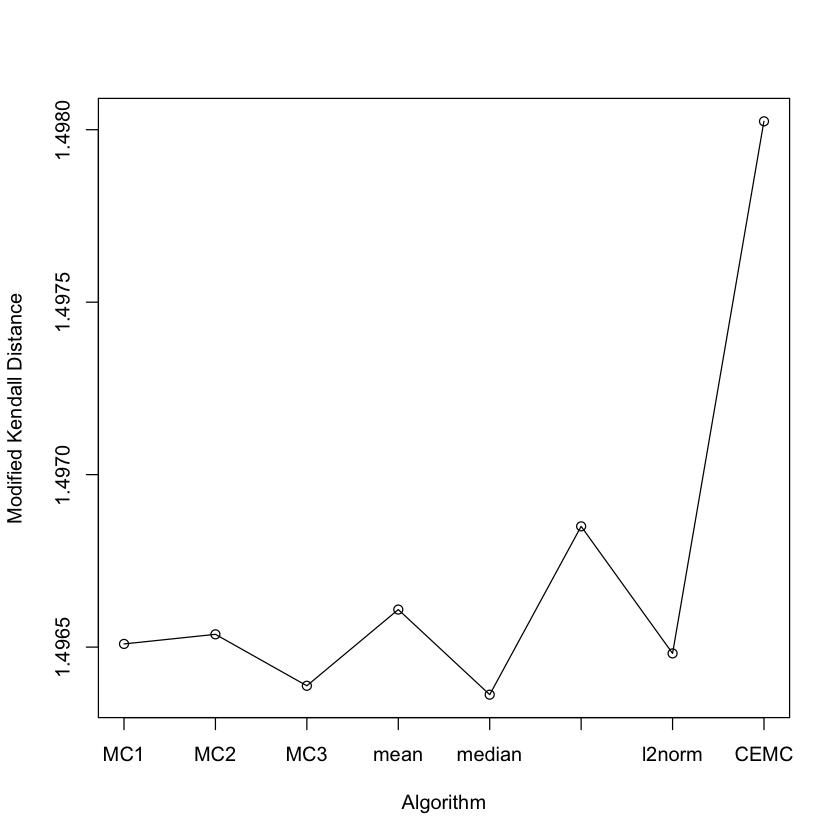

In [70]:
all.aggregates <- cbind(agglist.MC, agglist.Borda, agglist.CEMC)
Kendall.dist <- Kendall.plot(input = agg.inputs.full$input[sel.cond], all.aggregates = all.aggregates, space = agg.inputs.full$space[sel.cond], algorithm = names(all.aggregates))

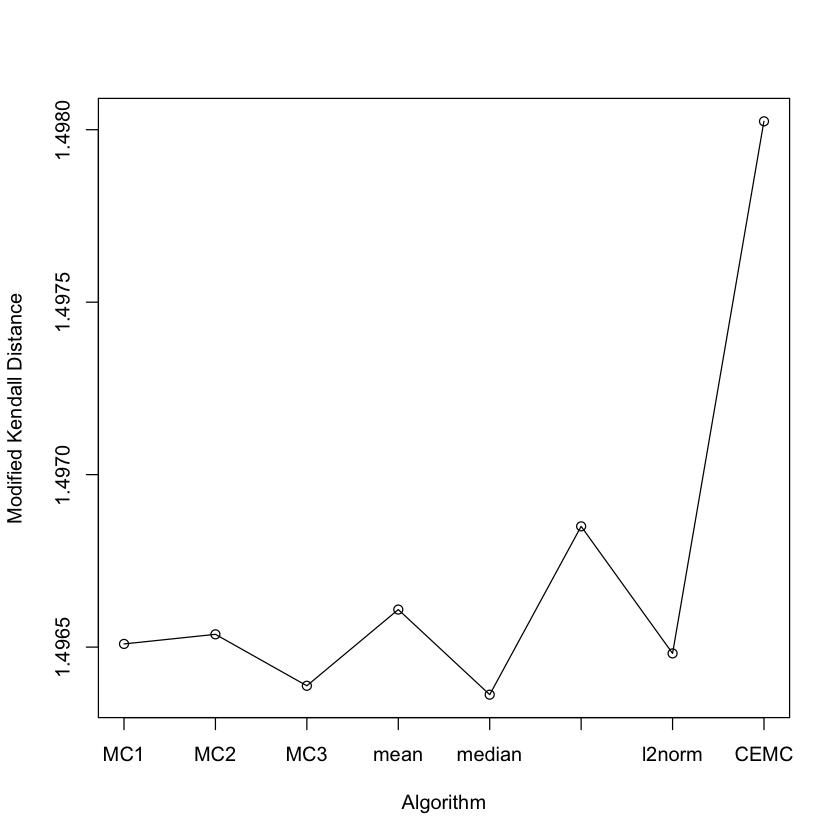

In [69]:
all.aggregates <- cbind(agglist.MC, agglist.Borda, agglist.CEMC)
w <- c(2, 1, 5)
w <- w / sum(w)
Kendall.dist.w <- Kendall.plot(input = agg.inputs.full$input[sel.cond], all.aggregates = all.aggregates, space = agg.inputs.full$space[sel.cond], algorithm = names(all.aggregates), w=w)

In [71]:
Kendall.dist

$`Modified Kendall Distance`
     MC1      MC2      MC3     mean   median geo.mean   l2norm     CEMC 
1.496509 1.496537 1.496388 1.496609 1.496362 1.496850 1.496482 1.498024

In [72]:
Kendall.dist.w

$`Modified Kendall Distance`
     MC1      MC2      MC3     mean   median geo.mean   l2norm     CEMC 
1.496509 1.496537 1.496388 1.496609 1.496362 1.496850 1.496482 1.498024